<p style="color:#FFF; background:#800000; padding:12px; font-size:20px; font-style:italic; text-align:center">
<span style="width:49%; display:inline-block; text-align:left">BAILLET Benjamin</span>
<span style="width:49%; display:inline-block; text-align:right">MILLOT Alexandra </span>
<span style="font-size:48px; font-style:normal"><b>Devoir maison 2</b></span><br>
<span style="width:49%; display:inline-block; text-align:left"></span>
<span style="width:49%; display:inline-block; text-align:right">Master IREF </span></p>

In [157]:
# Bibliothèques

import graphviz
import pandas as pd
import numpy as np
import itertools
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from IPython.display import Image  
from sklearn.tree import DecisionTreeClassifier
import statsmodels.api as sm
from sklearn.metrics import roc_auc_score
import pydotplus
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydot
from subprocess import call
import time
import os
from sklearn import metrics
from sklearn.linear_model import LogisticRegressionCV


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

<h2 style="padding:10px; color:#FFF; background:#800000"> 1) Importation et traitement des données</h2>

Pour le traitement des données nous avons sélectionné :

- Les bilan des PME entre 2012 et 2014 dont le chiffre d'affaires est inférieur à 10 millions (le chiffre d'affaire représente les ventes totale) ;

- À partir des données qu'on obtient nous gardons seulement les entreprises dont nous disposons de leurs trois bilans (2012, 2013 et 2014) ;

- Nous sélectionnons par la suite les entreprises opérationnelles en 2012 : Les ventes totales sont supérieures à 1000 

In [158]:
#Chargement des données :

data = pd.read_csv('original_bisnode_data.csv')
data

,comp_id,begin,end,COGS,amort,curr_assets,curr_liab,extra_exp,extra_inc,extra_profit_loss,...,gender,origin,nace_main,ind2,ind,urban_m,region_m,founded_date,exit_date,labor_avg
0,1.001034e+06,2005-01-01,2005-12-31,NaN,692.592590,7266.666504,7574.074219,0.0,0.0,0.0,...,mix,Domestic,5630.0,56.0,3.0,1,Central,1990-11-19,NaN,NaN
1,1.001034e+06,2006-01-01,2006-12-31,NaN,603.703674,13122.222656,12211.111328,0.0,0.0,0.0,...,mix,Domestic,5630.0,56.0,3.0,1,Central,1990-11-19,NaN,NaN
2,1.001034e+06,2007-01-01,2007-12-31,NaN,425.925934,8196.295898,7800.000000,0.0,0.0,0.0,...,mix,Domestic,5630.0,56.0,3.0,1,Central,1990-11-19,NaN,NaN
3,1.001034e+06,2008-01-01,2008-12-31,NaN,300.000000,8485.185547,7781.481445,0.0,0.0,0.0,...,mix,Domestic,5630.0,56.0,3.0,1,Central,1990-11-19,NaN,NaN
4,1.001034e+06,2009-01-01,2009-12-31,NaN,207.407410,5137.037109,15300.000000,0.0,0.0,0.0,...,mix,Domestic,5630.0,56.0,3.0,1,Central,1990-11-19,NaN,0.083333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287824,4.641209e+11,2011-01-01,2011-12-31,NaN,0.000000,1807.407349,3.703704,0.0,0.0,0.0,...,female,Domestic,5510.0,55.0,3.0,2,East,1990-08-22,NaN,NaN
287825,4.641209e+11,2012-01-01,2012-12-31,NaN,0.000000,1518.518555,96.296295,0.0,0.0,0.0,...,female,Domestic,5510.0,55.0,3.0,2,East,1990-08-22,NaN,NaN
287826,4.641209e+11,2013-01-01,2013-12-31,NaN,0.000000,988.888916,77.777779,0.0,0.0,0.0,...,NaN,NaN,5510.0,55.0,3.0,2,East,1990-08-22,NaN,NaN
287827,4.641209e+11,2014-01-01,2014-12-31,NaN,0.000000,644.444458,233.333328,0.0,0.0,0.0,...,female,Domestic,5510.0,55.0,3.0,2,East,1990-08-22,NaN,NaN


Rappelons les colonnes du tableau initial:

- begin : début du bilan (date)
- end : fin du bilan (date)
- COGS : coûts des marchandises vendues
- amort : amortissement
- curr_assets : actifs courants
- curr_liab : passif courant
- extra_exp : extra_expenditures
- extra_inc : revenu supplémentaire
- extra_profit_loss : perte de profit supplémentaire
- finish_prod : production terminée
- fix_assets : immobilisations
- inc_bef_tax : revenu avant impôt
- intang_assets : actifs incorporels
- stocks : stocks
- liq_assets : actifs liquides
- materials_exp : dépense matière D22
- net_dom_sales : ventes intérieures nettes
- net_exp_sales : ventes nettes à l'exportation
- personnel_exp : dépenses de personnel
- profit_loss_year : Bénéfice/perte, annuel
- sales : Ventes totales
- share_eq : Capitaux propres
- Subscribed_cap : Capital souscrit
- tang_assets : Actifs corporels
- wages : Salaires (masse salariale)
- balsheet_flag : balsheet_flag
- balsheet_length : balsheet_length
- balsheet_notfullyear : balsheet_notfullyear
- année : année
- found_year : Année de création de l'entreprise
- exit_year : Année de sortie de l'entreprise
- ceo_count : nombre de PDG/hauts dirigeants
- foreign : Part des PDG étrangers
- females : Part des femmes PDG
- Birth_year : année de naissance moyenne des PDG
- inoffice_days : temps moyen pendant lequel les PDG sont en fonction
- gender : Genre (femme uniquement, homme uniquement, mixte)
- origin : Origine du PDG (nationale, étrangère, mixte)
- nace_main : code secteur NACE, 4 chiffres
- ind2 : code secteur NACE, 2 chiffres
- ind : code général de l'industrie
- urban_m : Siège social de l'entreprise (1 : capitale, 2 : autre grande ville 3 : autre)
- region_m : Région du siège social de l'entreprise (Centre, Ouest, Est)
- found_date : Date de création de l'entreprise
- exit_date : Date de sortie ferme
- labor_avg : Nombre d'employés (moyenne annuelle)

In [159]:
### Traitement des données ###

# Supprimer les colonnes non utiles
data = data.drop(['end', 'COGS', 'finished_prod', 'ind', 'region_m', 'ind2', 'net_exp_sales', 'origin', 'net_dom_sales', 'gender', 'balsheet_notfullyear', 'balsheet_length', 'balsheet_flag', 'birth_year', 'inoffice_days', 'personnel_exp'], axis=1) 

# Sélection des bilan d'entreprises entre 2012 et 2014
data = data[(data['begin'] == '2012-01-01') | (data['begin'] == '2013-01-01') | (data['begin'] == '2014-01-01')] 

# Filtrer les lignes où 'sales' est inférieur à 10 millions
data = data[data['sales'] < 10000000]

# Récupérer les identifiants des entreprises pour chaque année
comp_id_2012 = data[data['begin'] == '2012-01-01']['comp_id'].unique()
comp_id_2013 = data[data['begin'] == '2013-01-01']['comp_id'].unique()
comp_id_2014 = data[data['begin'] == '2014-01-01']['comp_id'].unique()

# Filtrer les données d'origine pour garder seulement celles avec les comp_id sélectionnés pour chaque année
data = data[data['comp_id'].isin(comp_id_2012) & data['comp_id'].isin(comp_id_2013) & data['comp_id'].isin(comp_id_2014)]


# Sélection des entreprises opérationnelles en 2012 
selected_companies = data[(data['begin'] == '2012-01-01') & (data['sales'] > 1000)] # Filtrer les lignes où 'sales' est supérieur à 1000 en 2012
selected_comp_ids = selected_companies['comp_id'] # Récupérer les comp_id des entreprises sélectionnées
data = data[data['comp_id'].isin(selected_comp_ids)] # Filtrer les données d'origine pour garder seulement celles avec les comp_id sélectionnés

data

,comp_id,begin,amort,curr_assets,curr_liab,extra_exp,extra_inc,extra_profit_loss,fixed_assets,inc_bef_tax,...,founded_year,exit_year,ceo_count,foreign,female,nace_main,urban_m,founded_date,exit_date,labor_avg
14,1.001541e+06,2012-01-01,481.481476,9.629630e+03,1.303704e+03,0.000000,0.000000,0.000000,190566.671875,-7.696296e+03,...,2008.0,NaN,1.0,0.0,0.000000,5610.0,3,2008-02-24,NaN,NaN
15,1.001541e+06,2013-01-01,2292.592529,4.811111e+03,9.259259e+02,0.000000,74.074074,74.074074,188274.078125,8.740741e+02,...,2008.0,NaN,2.0,0.0,0.000000,5610.0,3,2008-02-24,NaN,NaN
16,1.001541e+06,2014-01-01,2292.592529,6.500000e+03,2.962963e+02,0.000000,0.000000,0.000000,185981.484375,3.703704e+01,...,2008.0,NaN,2.0,0.0,0.000000,5610.0,3,2008-02-24,NaN,NaN
23,1.002029e+06,2012-01-01,14929.629883,2.038852e+05,1.204445e+05,0.000000,0.000000,0.000000,23459.259766,1.181852e+04,...,2006.0,NaN,2.0,0.0,0.000000,2711.0,3,2006-07-03,NaN,0.458333
24,1.002029e+06,2013-01-01,14255.555664,2.171037e+05,1.611741e+05,0.000000,0.000000,0.000000,65177.777344,1.658889e+04,...,2006.0,NaN,1.0,0.0,0.000000,2711.0,3,2006-07-03,NaN,0.437500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287799,4.640446e+11,2013-01-01,77248.148438,6.055000e+06,1.930922e+06,0.000000,0.000000,0.000000,225403.703125,1.527022e+06,...,2008.0,NaN,1.0,1.0,0.000000,3312.0,3,2008-10-09,NaN,1.993056
287800,4.640446e+11,2014-01-01,71570.367188,6.486366e+06,2.499133e+06,0.000000,0.000000,0.000000,284537.031250,2.031437e+06,...,2008.0,NaN,1.0,1.0,0.000000,3312.0,3,2008-10-09,NaN,2.305556
287814,4.641050e+11,2012-01-01,1311.111084,3.261481e+04,1.104815e+04,22.222221,0.000000,-22.222221,8125.925781,4.222222e+02,...,1989.0,NaN,3.0,0.0,0.666667,5610.0,3,1989-04-28,NaN,1.060606
287815,4.641050e+11,2013-01-01,633.333313,3.971482e+04,1.342963e+04,0.000000,0.000000,0.000000,8385.185547,3.937037e+03,...,1989.0,NaN,3.0,0.0,0.666667,5610.0,3,1989-04-28,NaN,1.131944


• Traitement des données manquantes et aberrantes

Cette étape consiste à traiter les valeurs aberrantes et les valeurs manquantes. 

In [160]:
data = data.drop(columns=['D', 'founded_year' , 'founded_date' , 'female', 'nace_main', 'begin', 'year'])

In [161]:
# On regarde les NAN

data.isna().sum()

comp_id                  0
amort                   86
curr_assets             15
curr_liab               15
extra_exp                0
extra_inc                0
extra_profit_loss        0
fixed_assets            15
inc_bef_tax              0
intang_assets           15
inventories             15
liq_assets              15
material_exp            86
profit_loss_year        15
sales                    0
share_eq                15
subscribed_cap          15
tang_assets             15
wages                49774
exit_year            50573
ceo_count             2910
foreign               2910
urban_m                  0
exit_date            50442
labor_avg            10635
dtype: int64

In [162]:
# On regarde les valeurs négatives

colonnes = data.select_dtypes(include=['number'])
nb_negatifs_par_colonne = colonnes.apply(lambda x: (x < 0).sum())
nb_negatifs_par_colonne

comp_id                  0
amort                   16
curr_assets             26
curr_liab               25
extra_exp               13
extra_inc                2
extra_profit_loss     3683
fixed_assets             1
inc_bef_tax          20269
intang_assets            6
inventories              4
liq_assets              56
material_exp            18
profit_loss_year     20540
sales                    3
share_eq             17317
subscribed_cap           0
tang_assets              1
wages                   11
exit_year                0
ceo_count                0
foreign                  0
urban_m                  0
labor_avg                0
dtype: int64

In [163]:
def replace_negatives_and_missing(data, column):
    # Vérifier si les valeurs sont positives
    value_counts = data[column] >= 0
    
    # Compter le nombre de valeurs négatives ou manquantes
    nombre_de_false = (~value_counts).sum()
    
    # Remplacer les valeurs négatives par leur valeur absolue
    data[column] = data[column].abs()
    
    # Calculer la moyenne de la colonne
    mean_value = data[column].mean()
    
    # Remplacer les valeurs manquantes par la moyenne
    data[column].fillna(mean_value, inplace=True)

# Liste des colonnes à traiter
columns_to_process = ['amort','curr_assets', 'curr_liab', 'extra_exp','extra_inc', 'extra_profit_loss', 'fixed_assets', 'inc_bef_tax', 'intang_assets', 'inventories', 'liq_assets','material_exp', 'profit_loss_year', 'sales', 'share_eq', 'subscribed_cap', 'tang_assets', 'wages', 'ceo_count', 'foreign', 'urban_m', 'labor_avg']

# Traitement pour chaque colonne
for column in columns_to_process:
    replace_negatives_and_missing(data, column)

In [164]:
# On vérifie qu'il n'y a plus de Nan (exit_year  et exit_date sont traités à part)

data.isna().sum()

comp_id                  0
amort                    0
curr_assets              0
curr_liab                0
extra_exp                0
extra_inc                0
extra_profit_loss        0
fixed_assets             0
inc_bef_tax              0
intang_assets            0
inventories              0
liq_assets               0
material_exp             0
profit_loss_year         0
sales                    0
share_eq                 0
subscribed_cap           0
tang_assets              0
wages                    0
exit_year            50573
ceo_count                0
foreign                  0
urban_m                  0
exit_date            50442
labor_avg                0
dtype: int64

In [165]:
# On vérifie qu'il n'y a plus de négatifs

colonnes = data.select_dtypes(include=['number'])
nb_negatifs_par_colonne = colonnes.apply(lambda x: (x < 0).sum())
nb_negatifs_par_colonne

comp_id              0
amort                0
curr_assets          0
curr_liab            0
extra_exp            0
extra_inc            0
extra_profit_loss    0
fixed_assets         0
inc_bef_tax          0
intang_assets        0
inventories          0
liq_assets           0
material_exp         0
profit_loss_year     0
sales                0
share_eq             0
subscribed_cap       0
tang_assets          0
wages                0
exit_year            0
ceo_count            0
foreign              0
urban_m              0
labor_avg            0
dtype: int64

- Pour finir nous rajoutons notre variable dépendante binaire 'sortie' qui prend 1 si l'entreprise fait faillite entre 2012 et 2014 (faillite dans les deux ans), 0 sinon.

Pour cela nous nous intéressons aux variables `exit_date` et `exit_year`  

In [166]:
### exit_date ###

data['exit_date'] = pd.to_datetime(data['exit_date']) # Convertir la colonne 'exit_date' en datetime pour effectuer une comparaison de dates

# Sélectionner les identifiants où la colonne 'exit_date' est NaN
comp_id_exit_nan_d = data[data['exit_date'].isnull()]['comp_id']

# Sélectionner les identifiants où la colonne 'exit_date' n'est pas NaN
comp_id_exit_not_nan_d = data[~data['exit_date'].isnull()]['comp_id']

In [167]:
### exit_year ###

# Sélectionner les identifiants où la colonne 'exit_year' est NaN
comp_id_exit_nan_y = data[data['exit_year'].isnull()]['comp_id']

# Sélectionner les identifiants où la colonne 'exit_year' n'est pas NaN
comp_id_exit_not_nan_y = data[~data['exit_year'].isnull()]['comp_id']

In [168]:
# Filtrer les données
data = data[data['comp_id'].isin(comp_id_exit_not_nan_d) | data['comp_id'].isin(comp_id_exit_not_nan_y)]

In [169]:
data['sortie'] = 0 # Créer la variable "sortie" qui prend la valeur 0 par défaut

In [170]:
# Définir les conditions pour mettre à jour la colonne 'sortie'
conditions = (
    ((data['exit_date'].dt.year >= 2012) & (data['exit_date'].dt.year <= 2014)) | 
    (data['exit_year'].isin([2012, 2013, 2014]))
)

# Mettre à jour la colonne 'sortie' en fonction des conditions
data.loc[conditions, 'sortie'] = 1

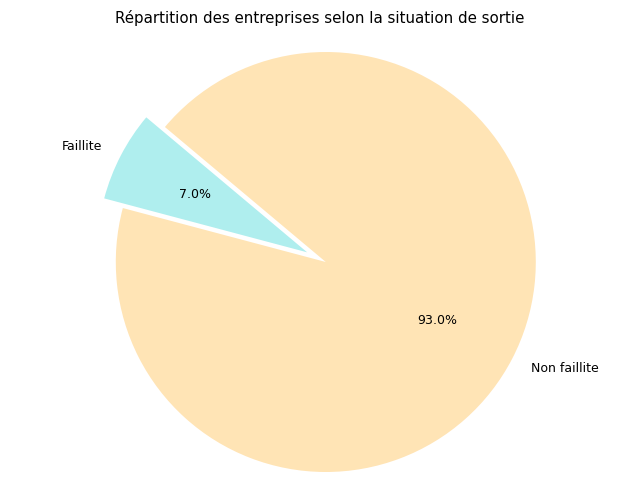

In [171]:
# Compter le nombre d'entreprises ayant fait faillite (sortie = 1) et celles qui n'ont pas fait faillite (sortie = 0)
faillites = data[data['sortie'] == 1].shape[0]
non_faillites = data[data['sortie'] == 0].shape[0]

# Créer les étiquettes et les valeurs pour le diagramme circulaire
labels = ['Faillite', 'Non faillite']
sizes = [faillites, non_faillites]
colors = ['paleturquoise', 'moccasin']
explode = (0.1, 0)  # Pour faire ressortir le secteur des faillites

# Créer le diagramme circulaire
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Assure que le diagramme circulaire est dessiné en cercle
plt.title('Répartition des entreprises selon la situation de sortie')
plt.show()

In [172]:
data.sortie.value_counts()

sortie
0    1800
1     135
Name: count, dtype: int64

135 entreprises font faillite sur les 1935 entreprises conservées après le traitement des données

In [173]:
data = data.drop(columns=['exit_year' , 'exit_date', 'comp_id'])

In [174]:
data

,amort,curr_assets,curr_liab,extra_exp,extra_inc,extra_profit_loss,fixed_assets,inc_bef_tax,intang_assets,inventories,...,sales,share_eq,subscribed_cap,tang_assets,wages,ceo_count,foreign,urban_m,labor_avg,sortie
91,688.888916,6166.666504,6792.592773,0.0,0.0,0.0,5133.333496,1262.963013,0.0,555.555542,...,26096.296875,3718.518555,3703.703613,5133.333496,323570.085767,1.0,0.0,1,0.083333,0
92,503.703705,3859.259277,8114.814941,0.0,0.0,0.0,922.222229,5714.814941,0.0,814.814819,...,42518.519531,3333.333252,3703.703613,922.222229,323570.085767,1.0,0.0,1,0.083333,0
93,751.851868,1185.185181,6355.555664,0.0,0.0,0.0,1162.963013,262.962952,0.0,555.555542,...,46644.445312,4359.259277,3703.703613,1162.963013,323570.085767,1.0,0.0,1,0.083333,0
485,0.000000,14425.925781,17011.111328,0.0,0.0,0.0,13570.370117,659.259277,0.0,7544.444336,...,49333.332031,3577.777832,1851.851807,13570.370117,323570.085767,1.0,0.0,2,0.131944,0
486,1959.259277,855.555542,14007.407227,0.0,0.0,0.0,0.000000,22411.111328,0.0,800.000000,...,1840.740723,18855.554688,1851.851807,0.000000,323570.085767,1.0,0.0,2,0.083333,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286698,2288.888916,3281.481445,186188.890625,0.0,0.0,0.0,194122.218750,6003.703613,0.0,0.000000,...,29466.666016,11255.555664,1851.851807,194122.218750,323570.085767,1.0,0.0,2,0.083333,0
286699,5062.962891,7674.074219,187992.593750,0.0,0.0,0.0,191362.968750,840.740723,0.0,0.000000,...,28855.554688,10303.704102,1851.851807,191362.968750,323570.085767,1.0,0.0,2,0.151515,0
287156,0.000000,17155.554688,1900.000000,0.0,0.0,0.0,4259.259277,1844.444458,0.0,977.777771,...,3703.703613,19459.259766,11111.111328,4259.259277,323570.085767,1.0,0.0,3,0.166667,0
287157,0.000000,16025.925781,266.666656,0.0,0.0,0.0,4259.259277,1629.629639,0.0,0.000000,...,166.666672,20018.517578,11111.111328,4259.259277,323570.085767,1.0,0.0,3,0.686047,0


<h2 style="padding:10px; color:#FFF; background:#800000"> 2) Prédiction </h2>

Tout d'abord il est important de noter que nous sommes dans le cas de l'apprentissage supervisé : le but est de trouver un moyen d’exprimer la variable de sortie en fonction des variables d’entrée.

De plus la cible est une valeur réelle (0 ou 1) à prédire: on parle de problème de régression. Dans un premier temps nous allons cherche le modèle approprié pour prédire la sortie de l'entreprise.

<h2 style="padding:7px; color:#FFF; background:#800000"> A) La classification: 3 classifieurs </h2>

Désormais, nous avons trouvé le meilleur modèle de régression pour prédire la faillite ou non de l'entreprise.
Nous allons pour continuer nous intéresser à la classificiation par le bias de 3 classifieurs:
- Régression logistique
- KNN
- Arbre de décision

<h2 style="padding:5px; color:#FFF; background:#800000"> Régression logistique </h2>

Nous allons faire la régression logistique sur chaque variable et observer si chacune a un impact positif ou négatif sur la variable dépendante 'sortie', par l'étude du coefficient obtenu à la fin de la régression.
En effet, si le coefficient associé à la variable indépendante est positif, alors la variable a un impact positif sur la faillite de l'entreprise.

In [175]:
#On convertit les valeurs de la colonne 'faillite' en valeurs numériques
data['sortie'] = data['sortie'].astype(int)

In [176]:
#Séparation des caractéristiques (X) de la variable cible (y)

X = data.drop(columns=['sortie'])
y = data['sortie']

In [177]:
X = X.assign(Intercept=1)
logit_model1=sm.Logit(y,X)
result=logit_model1.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.231363
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                 sortie   No. Observations:                 1935
Model:                          Logit   Df Residuals:                     1912
Method:                           MLE   Df Model:                           22
Date:                Tue, 09 Apr 2024   Pseudo R-squ.:                 0.08566
Time:                        16:44:38   Log-Likelihood:                -447.69
converged:                       True   LL-Null:                       -489.63
Covariance Type:            nonrobust   LLR p-value:                 3.686e-09
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
amort             -7.363e-05   2.55e-05     -2.885      0.004      -0.000   -2.36e-05
curr_as

<h2 style="padding:1px; color:#FFF; background:#800000"> Interprétation </h2>

On regarde les pvalues et on conserve uniquement les variables dont la pvalue est inférieure à 5%, c'est à dire:
- amort
- curr_liab
- intang_assets
- material_exp
- sales
- subscribed_cap
- ceo_count
- foreign
- urban_m
- labor_avg 

Les variables ayant une influence positive sur la faillite:
- intang_assets
- sales 
- subscribed_cap
- ceo_count
- foreign

Les variables ayant un coefficient positif influencent positivement la faillite. 
A titre d'exemple, sales a un coefficient de 7.386e-06 > 0, donc plus la valeur de sales sera grande, plus l'entreprise risque de faire faillite.

Les variables ayant une influence négative sur la faillite:
- amort
- curr_liab
- material_exp
- urban_m
- labor_avg

Les variables ayant un coefficient négatif influencent négativement la faillite. 
A titre d'exemple, amort a un coefficient de -7.363e-05 < 0, donc plus la valeur de amort sera grande, moins l'entreprise risque de faire faillite.

<h2 style="padding:1px; color:#FFF; background:#800000"> Prédiction </h2>

In [178]:
print(result.prsquared)

0.0856568690765338


In [179]:
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)


#calcul de la prédiction sur l'échantillon test
y_pred_proba = result.predict(X_test)
y_pred_proba.head()

y_pred_test = np.where(y_pred_proba > 0.5, 1, 0) 
print(np.unique(y_pred_test,return_counts=True))

mc = pd.crosstab(y_test,y_pred_test) 
print(mc) 

# Transformer en matrice Numpy 
mcNumpy = mc.values

# Taux de succès
accm = np.sum(np.diagonal(mcNumpy))/np.sum(mcNumpy) 
print("Taux de succès : %.4f" % (accm)) 

# Taux d'erreur 
errm = 1.0 - accm 
print("Taux d'erreur : %.4f" % (errm))

# Définir la matrice de confusion
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_test)
print(cnf_matrix)
print("Taux de succès: ", metrics.accuracy_score(y_test, y_pred_test))

(array([0, 1]), array([385,   2]))
col_0     0  1
sortie        
0       364  0
1        21  2
Taux de succès : 0.9457
Taux d'erreur : 0.0543
[[364   0]
 [ 21   2]]
Taux de succès:  0.9457364341085271


In [180]:
clf = LogisticRegressionCV(cv=10, scoring='accuracy', multi_class='ovr',solver = 'liblinear', max_iter = 2000).fit(X, y)
clf.score(X, y) 

0.931782945736434

In [181]:
X

,amort,curr_assets,curr_liab,extra_exp,extra_inc,extra_profit_loss,fixed_assets,inc_bef_tax,intang_assets,inventories,...,sales,share_eq,subscribed_cap,tang_assets,wages,ceo_count,foreign,urban_m,labor_avg,Intercept
91,688.888916,6166.666504,6792.592773,0.0,0.0,0.0,5133.333496,1262.963013,0.0,555.555542,...,26096.296875,3718.518555,3703.703613,5133.333496,323570.085767,1.0,0.0,1,0.083333,1
92,503.703705,3859.259277,8114.814941,0.0,0.0,0.0,922.222229,5714.814941,0.0,814.814819,...,42518.519531,3333.333252,3703.703613,922.222229,323570.085767,1.0,0.0,1,0.083333,1
93,751.851868,1185.185181,6355.555664,0.0,0.0,0.0,1162.963013,262.962952,0.0,555.555542,...,46644.445312,4359.259277,3703.703613,1162.963013,323570.085767,1.0,0.0,1,0.083333,1
485,0.000000,14425.925781,17011.111328,0.0,0.0,0.0,13570.370117,659.259277,0.0,7544.444336,...,49333.332031,3577.777832,1851.851807,13570.370117,323570.085767,1.0,0.0,2,0.131944,1
486,1959.259277,855.555542,14007.407227,0.0,0.0,0.0,0.000000,22411.111328,0.0,800.000000,...,1840.740723,18855.554688,1851.851807,0.000000,323570.085767,1.0,0.0,2,0.083333,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286698,2288.888916,3281.481445,186188.890625,0.0,0.0,0.0,194122.218750,6003.703613,0.0,0.000000,...,29466.666016,11255.555664,1851.851807,194122.218750,323570.085767,1.0,0.0,2,0.083333,1
286699,5062.962891,7674.074219,187992.593750,0.0,0.0,0.0,191362.968750,840.740723,0.0,0.000000,...,28855.554688,10303.704102,1851.851807,191362.968750,323570.085767,1.0,0.0,2,0.151515,1
287156,0.000000,17155.554688,1900.000000,0.0,0.0,0.0,4259.259277,1844.444458,0.0,977.777771,...,3703.703613,19459.259766,11111.111328,4259.259277,323570.085767,1.0,0.0,3,0.166667,1
287157,0.000000,16025.925781,266.666656,0.0,0.0,0.0,4259.259277,1629.629639,0.0,0.000000,...,166.666672,20018.517578,11111.111328,4259.259277,323570.085767,1.0,0.0,3,0.686047,1


<h2 style="padding:5px; color:#FFF; background:#800000"> Le KNN </h2>

On cherche à prédire la sortie de l'entreprise en calculant y_pred

In [ ]:
# On enlève la colonne intercept

X = X.drop(columns=['Intercept'])

In [182]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

# Transformation-standardizing scaling
X_train_z = X_train.apply(lambda x:(x-x.mean()) / (x.std()))
X_test_z = X_test.apply(lambda x:(x-x.mean()) / (x.std()))
X_train_z.describe()

,amort,curr_assets,curr_liab,extra_exp,extra_inc,extra_profit_loss,fixed_assets,inc_bef_tax,intang_assets,inventories,...,profit_loss_year,sales,share_eq,subscribed_cap,tang_assets,wages,ceo_count,foreign,urban_m,labor_avg
count,1.548000e+03,1.548000e+03,1.548000e+03,1.548000e+03,1548.000000,1548.000000,1.548000e+03,1.548000e+03,1.548000e+03,1.548000e+03,...,1.548000e+03,1.548000e+03,1.548000e+03,1.548000e+03,1.548000e+03,1.548000e+03,1.548000e+03,1.548000e+03,1.548000e+03,1.548000e+03
mean,-6.885104e-18,1.491773e-17,-6.885104e-18,-1.147517e-17,0.000000,0.000000,9.180139e-18,-3.442552e-18,-2.295035e-17,5.737587e-18,...,-3.672055e-17,1.377021e-17,1.377021e-17,1.147517e-17,-2.295035e-17,-8.262125e-16,1.170468e-16,-2.295035e-18,-9.868649e-17,2.295035e-18
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.821160e-01,-1.848011e-01,-2.100214e-01,-6.250296e-02,-0.121645,-0.122240,-1.744214e-01,-1.973284e-01,-6.910256e-02,-1.819878e-01,...,-2.259545e-01,-2.746596e-01,-2.621587e-01,-1.451994e-01,-1.636125e-01,-4.798302e+00,-4.583215e-01,-3.745820e-01,-1.391919e+00,-4.566336e-01
25%,-1.821160e-01,-1.812407e-01,-1.985155e-01,-6.250296e-02,-0.121645,-0.122240,-1.744214e-01,-1.854657e-01,-6.910256e-02,-1.819878e-01,...,-2.140075e-01,-2.668751e-01,-2.411462e-01,-1.317247e-01,-1.636125e-01,1.251479e-01,-4.583215e-01,-3.745820e-01,-1.391919e+00,-4.079917e-01
50%,-1.753073e-01,-1.661910e-01,-1.586982e-01,-6.250296e-02,-0.121645,-0.122240,-1.735173e-01,-1.463591e-01,-6.910256e-02,-1.819878e-01,...,-1.660747e-01,-2.319499e-01,-1.962434e-01,-1.317247e-01,-1.628630e-01,1.251479e-01,-4.583215e-01,-3.745820e-01,-1.413730e-01,-1.410926e-01
75%,-1.301776e-01,-1.083491e-01,-7.517900e-02,-6.250296e-02,-0.121645,-0.122240,-1.555550e-01,-4.807348e-02,-6.910256e-02,-1.281516e-01,...,-3.884656e-02,-1.225720e-01,-1.084550e-01,-6.435097e-02,-1.460492e-01,1.251479e-01,-4.583215e-01,-3.745820e-01,1.109172e+00,1.464627e-01
max,2.058132e+01,2.389695e+01,2.124060e+01,2.737030e+01,21.886980,19.949112,1.643093e+01,2.639247e+01,2.502181e+01,2.235306e+01,...,3.014926e+01,1.129895e+01,1.701830e+01,1.871944e+01,1.625705e+01,1.012552e+01,8.317419e+00,3.023830e+00,1.109172e+00,1.795782e+01


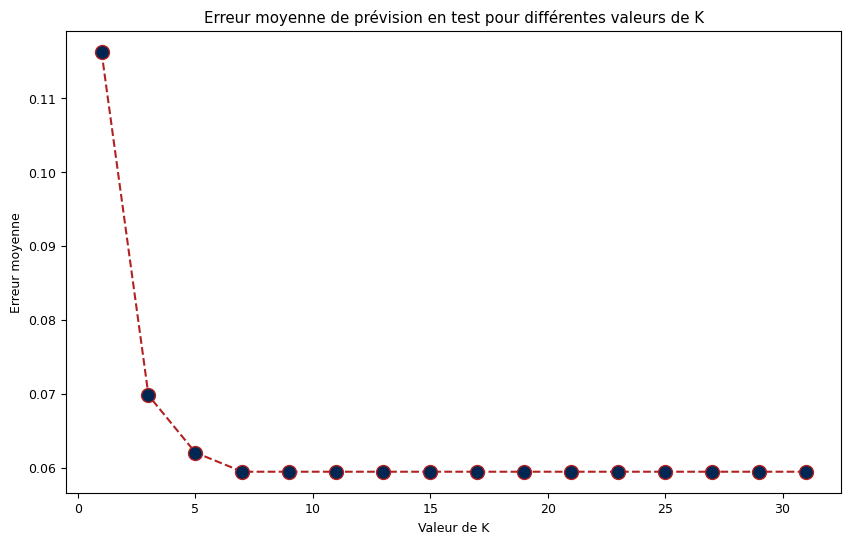

In [187]:
error = []

# Calcul de l'erreur pour les valeurs de K impaires entre 1 et 32
for i in range(1, 32, 2):  # Pour les valeurs impaires de 1 à 32 inclus
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    error.append(np.mean(y_pred != y_test))

# Visualisation de l'estimation de l'erreur de prévision sur l'échantillon de test
plt.figure(figsize=(10, 6))
plt.plot(range(1, 32, 2), error, color='#b22222', linestyle='dashed',
         marker='o', markerfacecolor='#002654', markersize=10)
plt.title("Erreur moyenne de prévision en test pour différentes valeurs de K")
plt.xlabel("Valeur de K")
plt.ylabel("Erreur moyenne")
plt.show()

In [188]:
# On prend k=7 selon le graphique ci-dessous

classifier = KNeighborsClassifier(n_neighbors= 7)  
classifier.fit(X_train_z, y_train)  

# The final step is to make predictions on our test data. To do so, execute 
# the following script:

y_pred = classifier.predict(X_test_z)  

y_class = pd.crosstab(index=y_test, columns=y_pred,margins=True)
y_class/y_class.loc["All","All"]

#For evaluating an algorithm, confusion matrix, precision, recall and f1 score 
#are the most commonly used metrics. The confusion_matrix and 
#classification_report methods of the sklearn.metrics can be used to calculate 
#these metrics. Take a look at the following script:

print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))

# evaluate accuracy

accuracy_score(y_test, y_pred)

[[358   6]
 [ 22   1]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       364
           1       0.14      0.04      0.07        23

    accuracy                           0.93       387
   macro avg       0.54      0.51      0.51       387
weighted avg       0.89      0.93      0.91       387



0.9276485788113695

In [194]:
# Faire des prédictions
y_pred = classifier.predict(X_test_z)  

# Afficher les prédictions
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


<h2 style="padding:1px; color:#FFF; background:#800000"> Interprétation </h2>

Les prédictions sont présentes ci-dessous.

Selon la matrice de confusion on a 358 vrais positifs, 6 faux positifs, 22 faux négatifs, 1 vrai négatif. Donc 28 entreprises sur 387 ont été incorrectement classifiées par l'approche du KNN, ce qui représente 7,2% des entreprises.

Pour ce qui en est de l'évaluation de la performance du modèle, on observe que la précision pour la sortie qui vaut 0 est de 0,94 alors que la précision pour la sortie qui vaut 1 est de 0,14.
La précision correspond au pourcentage des résultats qui sont pertinents. De ce fait 94% des résultats sont pertinents pour la sortie 0 et 14% pour la sortie 1.
De plus, le rappel correspond au pourcentage de résultats pertinents correctement classés par l'algorithme. Le rappel vaut 98% pour la sortie qui vaut 0 et 4%  pour la sortie qui vaut 1. De ce fait 98% des résultats pertinents sont correctement classés par l'algorithme pour la sortie 0, contre 4% pour la sortie 1.

De plus, la précision du modèle est de 0.9276485788113695.

<h2 style="padding:5px; color:#FFF; background:#800000"> L'arbre de décision </h2>

On fait la prédiction de la sortie de l'entreprise avec y_pred_gini. 

In [195]:
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fonction pour l'entraînement avec le critère de Gini
def train_using_gini(X_train, X_test, y_train): 
    # Création de l'objet classifieur avec le critère de Gini
    clf_gini = DecisionTreeClassifier(criterion="gini", random_state=None, max_depth=2, min_samples_leaf=5)
    # Entraînement
    clf_gini.fit(X_train, y_train) 
    return clf_gini 

# Fonction pour l'entraînement avec le critère d'entropie
def train_using_entropy(X_train, X_test, y_train): 
    # Création de l'objet classifieur avec le critère d'entropie
    clf_entropy = DecisionTreeClassifier(criterion="entropy", random_state=100, max_depth=2, min_samples_leaf=5)
    # Entraînement
    clf_entropy.fit(X_train, y_train) 
    return clf_entropy 

# Fonction pour les prédictions
def prediction(X_test, clf_object): 
    # Prédictions sur l'ensemble de test
    y_pred = clf_object.predict(X_test) 
    print("Valeurs prédites:") 
    print(y_pred) 
    return y_pred 

# Fonction pour calculer l'exactitude
def cal_accuracy(y_test, y_pred): 
    print("Matrice de confusion: ", confusion_matrix(y_test, y_pred)) 
    print("Exactitude : ", accuracy_score(y_test, y_pred) * 100) 
    print("Rapport : ", classification_report(y_test, y_pred)) 

In [197]:
# Entraînement avec le critère de Gini
clf_gini = train_using_gini(X_train, X_test, y_train) 

# Affichage des résultats
print("Résultats en utilisant l'indice de Gini:") 
# Prédictions en utilisant le critère de Gini
y_pred_gini = prediction(X_test, clf_gini) 
# Calcul de l'exactitude
cal_accuracy(y_test, y_pred_gini)

Résultats en utilisant l'indice de Gini:
Valeurs prédites:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Matrice de confusion:  [[358   3]
 [ 25   1]]
Exactitude :  92.76485788113695
Rapport :                precision    recall  f1-score   support

           

In [198]:
# Entraînement avec le critère d'entropie
clf_entropy = train_using_entropy(X_train, X_test, y_train) 

# Affichage des résultats
print("\nRésultats en utilisant l'entropie:") 
# Prédictions en utilisant le critère d'entropie
y_pred_entropy = prediction(X_test, clf_entropy) 
# Calcul de l'exactitude
cal_accuracy(y_test, y_pred_entropy) 


Résultats en utilisant l'entropie:
Valeurs prédites:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Matrice de confusion:  [[355   6]
 [ 25   1]]
Exactitude :  91.98966408268734
Rapport :                precision    recall  f1-score   support

           0    

<h2 style="padding:1px; color:#FFF; background:#800000"> Interprétation </h2>

Les algorithmes utilisés dans l’arbre de décision sont :
- l'indice de Gini
- l'entropie

Rappelons tout d'abord que Gini = 2 x AUC - 1. Plus la valeur de Gini est élevée, plus l’homogénéité est grande.  
De plus, l’entropie est une mesure de l’impureté. En comparant l’entropie avant et après la partition, nous obtenons une mesure du gain d’information. Plus le gain d’information est élevé, plus une caractéristique est apte à créer des groupes homogènes après une partition sur cette caractéristique. 

POUR GINI:

D'abord on s'intéresse à l'indice de Gini. 
Nous observons avec la matrice de confusion que  7,2% des entreprises qui sont incorrectement classifiées par l'approche de l'arbre de décision.
L'exactitude est de 92.76485788113695%. Pour ce qui en est de l'évaluation de la performance du modèle, on observe que la précision pour la sortie qui vaut 0 est de 0,93 alors que la précision piur la sortie qui vaut 1 est de 0,25.
La précision correspond au pourcentage des résultats qui sont pertinents. De ce fait 93% des résultats sont pertinents pour la sortie 0 et 25% pour la sortie 1. De plus, le rappel vaut 0,99 pour la sortie qui vaut 0 et 0,04 pour la sortie qui vaut 1. De ce fait 99% des résultats pertinents sont correctement classés par l'algorithme pour la sortie 0 contre 4% pour la sortie 1.

POUR ENTROPIE:

Nous observons avec la matrice de confusion que  7,9% des entreprises qui sont incorrectement classifiées par l'approche de l'arbre de décision.
L'exactitude est de 91.98966408268734%. Pour ce qui en est de l'évaluation de la performance du modèle, on observe que la précision pour la sortie qui vaut 0 est de 0,93 alors que la précision piur la sortie qui vaut 1 est de 0,14.
La précision correspond au pourcentage des résultats qui sont pertinents. De ce fait 93% des résultats sont pertinents pour la sortie 0 et 14% pour la sortie 1. De plus, le rappel vaut 0,98 pour la sortie qui vaut 0 et 0,04 pour la sortie qui vaut 1. De ce fait 98% des résultats pertinents sont correctement classés par l'algorithme pour la sortie 0 contre 4% pour la sortie 1.

<h2 style="padding:7px; color:#FFF; background:#800000"> C) Comparaison des classiffieurs avec l'AUC </h2>

Pour finir nous allons comparer les AUC des différents classifieurs. Le classifieur qui aura le AUC le plus élevé sera le meilleur. Rappelons qu'un classifieur parfait a une AUC de 1 alors qu'un classifieur aléatoire, une AUC de 0.5. L'AUC "Area Under the Curve" correspond à l'aire sous la courbe ROC  " Area Under the Curve ". Cela permet plus aisément de comparer plusieurs modèles.

<h2 style="padding:4px; color:#FFF; background:#800000"> Régression logistique </h2>

In [200]:
X = data.drop(columns=['sortie'])
y = data['sortie']

X = X.assign(Intercept=1)
logit_model1=sm.Logit(y,X)
result=logit_model1.fit()

y_pred_proba = result.predict(X)

# Calculer l'AUC
auc_logistic = roc_auc_score(y, y_pred_proba)

# Afficher l'AUC
print("Aire sous la courbe ROC (AUC) :", auc_logistic)

Optimization terminated successfully.
         Current function value: 0.231363
         Iterations 10
Aire sous la courbe ROC (AUC) : 0.6749012345679011


<h2 style="padding:4px; color:#FFF; background:#800000"> KNN </h2>

In [201]:
X = X.drop(columns=['Intercept'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

# Transformation-standardizing scaling
X_train_z = X_train.apply(lambda x:(x-x.mean()) / (x.std()))
X_test_z = X_test.apply(lambda x:(x-x.mean()) / (x.std()))
X_train_z.describe()

classifier = KNeighborsClassifier(n_neighbors= 7)  
classifier.fit(X_train_z, y_train)  

# The final step is to make predictions on our test data. To do so, execute 
# the following script:

y_pred = classifier.predict(X_test_z)  

y_class = pd.crosstab(index=y_test, columns=y_pred,margins=True)
y_class/y_class.loc["All","All"]

y_pred_proba = classifier.predict_proba(X_test_z)[:, 1]  # Probabilité de la classe positive

# Calculer l'AUC pour le modèle KNN
auc_knn = roc_auc_score(y_test, y_pred_proba)

# Afficher l'AUC
print("Aire sous la courbe ROC (AUC) pour le modèle KNN :", auc_knn)

Aire sous la courbe ROC (AUC) pour le modèle KNN : 0.7263497372193024


<h2 style="padding:4px; color:#FFF; background:#800000"> Arbre de décision </h2>

In [202]:
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fonction pour l'entraînement avec le critère de Gini
def train_using_gini(X_train, X_test, y_train): 
    # Création de l'objet classifieur avec le critère de Gini
    clf_gini = DecisionTreeClassifier(criterion="gini", random_state=None, max_depth=2, min_samples_leaf=5)
    # Entraînement
    clf_gini.fit(X_train, y_train) 
    return clf_gini 

# Fonction pour les prédictions
def prediction(X_test, clf_object): 
    # Prédictions sur l'ensemble de test
    y_pred = clf_object.predict(X_test) 
    print("Valeurs prédites:") 
    print(y_pred) 
    return y_pred 

# Entraînement avec le critère de Gini
clf_gini = train_using_gini(X_train, X_test, y_train) 

# Prédictions en utilisant le critère de Gini
y_pred_prob_gini = clf_gini.predict_proba(X_test)[:, 1]

# Calcul de l'AUC pour l'arbre de décision avec le critère de Gini
auc_arbre = roc_auc_score(y_test, y_pred_prob_gini)

# Affichage de l'AUC
print("AUC pour l'arbre de décision avec le critère de Gini:", auc_arbre)

AUC pour l'arbre de décision avec le critère de Gini: 0.551233585356148


<h2 style="padding:4px; color:#FFF; background:#800000"> Meilleur classifieur </h2>

In [203]:
# Comparaison des AUC
auc_scores = [auc_logistic, auc_knn, auc_arbre]

# Noms des classifieurs correspondants
model_names = ["Régression logistique", "k-NN", "Arbre de décision"]

# Trouver l'index du modèle avec le meilleur AUC
best_auc_index = np.argmax(auc_scores)

# Afficher le modèle avec le meilleur AUC
best_auc = auc_scores[best_auc_index]
best_model_name = model_names[best_auc_index]
print("Meilleur modèle:", best_model_name)
print("Meilleur AUC:", best_auc)

Meilleur modèle: k-NN
Meilleur AUC: 0.7263497372193024


<h2 style="padding:1px; color:#FFF; background:#800000"> Interprétation </h2>

Pour conclure, les meilleurs classifieurs en termes d'AUC sont dans l'ordre:
- le KNN
- la régression logistique
- arbre de décision